# Restaurant recommender system

For this project I am using a dataset provided by yelp for practical or academic purposes. The details of the dataset can be found in the link shown below:

https://www.yelp.com/dataset/documentation/main

This exercise has 2 parts:
* On one hand I want to be able to recommend a good restaurant to a hungry person, 
* and on the other hand recommend to a potential restaurateur what are some of the characteristics that he should take into account before thinking about setting up a restaurant . 

To achieve these objectives, I will seek to fulfill the following activities:
* Combine the dataset documents to identify the types of restaurants in the area to be studied.
* Find out how certain characteristics such as location, number of reviews, type of food or attributes are related to the number of stars.
* Explain to a restaurateur what are the general characteristics that a restaurant with a high classification must meet.
* Recommend a restaurant to a client, once he delivers information such as the maximum distance that should exist between the restaurant and him and the type of food he wants to try.


#### Recommending restaurants to a client.

The idea is that if a user defines how far he wants the restaurant to be and what kind of food he wants to eat, I can recommend the best one. This recommendation system can be seen at the following [link](http://localhost:8888/notebooks/dspt7/personal_project/recommender.ipynb).

#### Recommending restaurant characteristics to a restaurateur.

The idea is to understand which are the main characteristics that must be taken into account before opening a restaurant. You can check the recommendations at end the of this <a href="#Conclusions.">file</a>

 # Download, cleaning and pre-processing of the dataset </font>

As I said before, the first step is to download and clean the dataset files. The objective of this step is to remove all unnecessary information and unify the information sources so that it is ready to obtain a single dataframe with all the information necessary to perform the analysis.

#### Library import.

In [1]:
 import pandas as pd 

#### File download.

The first file to review is **yelp_academic_dataset_business.csv**.

In [2]:
busi=pd.read_csv('yelp_academic_dataset_business.csv')
busi.head(1)
busi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       145219 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150273 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


From the information it displays, this is going to be my main dataframe. Once I have the information shown here, the next thing I want to see is where the businesses are located.

In [3]:
l_state=busi.state.tolist()
print(busi.state.unique())

['CA' 'MO' 'AZ' 'PA' 'TN' 'FL' 'IN' 'LA' 'AB' 'NV' 'ID' 'DE' 'IL' 'NJ'
 'NC' 'CO' 'WA' 'HI' 'UT' 'TX' 'MT' 'MI' 'SD' 'XMS' 'MA' 'VI' 'VT']


It seems that the dataset only shows information from businesses that are in the United States, so I will choose the state of Florida, because I think that since it is a tourist place, it must have a great offer of restaurants.

In [4]:
florida = busi[busi['state'] == 'FL'] # Filter by state to choose FL
florida=florida.drop(['address','state','hours'],axis=1) #Drop columns that dont add value
florida['total_review_count']=florida['review_count'] # Rename a column to avoid possible confusion with other df
florida=florida.drop(['review_count'],axis=1) # Drop the renamed column
florida=florida[florida['is_open']==1] # Filter the df. According to the main documentation, this column has 2 possible 
# values, 0 for closed business and 1 to represent the open ones.
florida=florida.drop(['is_open'],axis=1) #Drop the is_open column.
florida['avg_rating']=florida['stars'] # The average rating of the business.
florida=florida.drop(['stars'], axis=1) #Drop the star column.
florida.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21540 entries, 7 to 150345
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   business_id         21540 non-null  object 
 1   name                21540 non-null  object 
 2   city                21540 non-null  object 
 3   postal_code         21535 non-null  object 
 4   latitude            21540 non-null  float64
 5   longitude           21540 non-null  float64
 6   attributes          19154 non-null  object 
 7   categories          21520 non-null  object 
 8   total_review_count  21540 non-null  int64  
 9   avg_rating          21540 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 1.8+ MB


In [5]:
l_atributes=florida.attributes.tolist()
print(florida.attributes.head())

7                                                   NaN
10    {'RestaurantsPriceRange2': '2', 'BikeParking':...
11    {'Alcohol': "'none'", 'OutdoorSeating': 'None'...
13                        {'ByAppointmentOnly': 'True'}
54    {'BusinessParking': "{'garage': False, 'street...
Name: attributes, dtype: object


The second one is **yelp_academic_dataset_checkin.csv**.

In [6]:
check=pd.read_csv('yelp_academic_dataset_checkin.csv')
check.head(1)
check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


I don't see that it has relevant information, so I'm not going to use it.

The third document to review **yelp_academic_dataset_tip.csv**

In [7]:
tip=pd.read_csv('yelp_academic_dataset_tip.csv')
print(tip.head(1))
tip.info()


                  user_id             business_id  \
0  AGNUgVwnZUey3gcPCJ76iw  3uLgwr0qeCNMjKenHJwPGQ   

                             text                 date  compliment_count  
0  Avengers time with the ladies.  2012-05-18 02:17:21                 0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           908915 non-null  object
 1   business_id       908915 non-null  object
 2   text              908910 non-null  object
 3   date              908915 non-null  object
 4   compliment_count  908915 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 34.7+ MB


I will only use 2 columns, business_id & text.

In [8]:
tip_d=tip.drop(['user_id','compliment_count','date'],axis=1)
tip_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  908915 non-null  object
 1   text         908910 non-null  object
dtypes: object(2)
memory usage: 13.9+ MB


THE TABLE OF TIP WILL MERGED TO FLORIDA BY THE BUSINESS_ID

The fourth would be **yelp_academic_dataset_user.json** but I will not use it because the information it contains is closely associated with the profile of the platform's users, and my focus is on restaurants. The details of this file can be seen in the dataset documentation, but still create a dataframe with the column names by passing the .json to .csv, in case someone wants to do a quick review of the content of this file.

In [9]:
user=pd.DataFrame(['user_id','name','review_count','yelping_since','useful','funny','cool','elite','friends','fans,average_stars','compliment_hot','compliment_more','compliment_profile','compliment_cute','compliment_list','compliment_note','compliment_plain','compliment_cool','compliment_funny','compliment_writer','compliment_photos'])
print(user)
user.info()

                     0
0              user_id
1                 name
2         review_count
3        yelping_since
4               useful
5                funny
6                 cool
7                elite
8              friends
9   fans,average_stars
10      compliment_hot
11     compliment_more
12  compliment_profile
13     compliment_cute
14     compliment_list
15     compliment_note
16    compliment_plain
17     compliment_cool
18    compliment_funny
19   compliment_writer
20   compliment_photos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       21 non-null     object
dtypes: object(1)
memory usage: 296.0+ bytes


The last document to review is **yelp_academic_dataset_review.json**, due to its size of more than 5GB, I had to work on this document previously in Mongodb Compass. I leave below a dataframe with the columns that are obtained when passing the document from .json to .csv.

In [10]:
review=pd.DataFrame(['id','review_id','user_id','business_id','stars','useful','funny','cool','text','date'])
review

0
0           id
1    review_id
2      user_id
3  business_id
4        stars
5       useful
6        funny
7         cool
8         text
9         date

Once in Mongodb Compass remove the following columns: review_id, user_id, useful, funny, cool & date. And export the resulting file in a .csv that could be read from this notebook.

In [11]:
reviews=pd.read_csv('problematico.csv')

In [12]:
reviews.head(1)

_id             business_id  stars  \
0  63dba4792d435aac73c038cf  XQfwVwDr-v0ZS3_CbbE5Xw      3   

                                                text  
0  If you decide to eat here, just be aware it is...

In [13]:
review=reviews.drop(['_id'], axis=1)
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 3 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   business_id  object
 1   stars        int64 
 2   text         object
dtypes: int64(1), object(2)
memory usage: 160.0+ MB


I leave below an image of what the deletion of pairs from Compass db looks like, in case it is useful:

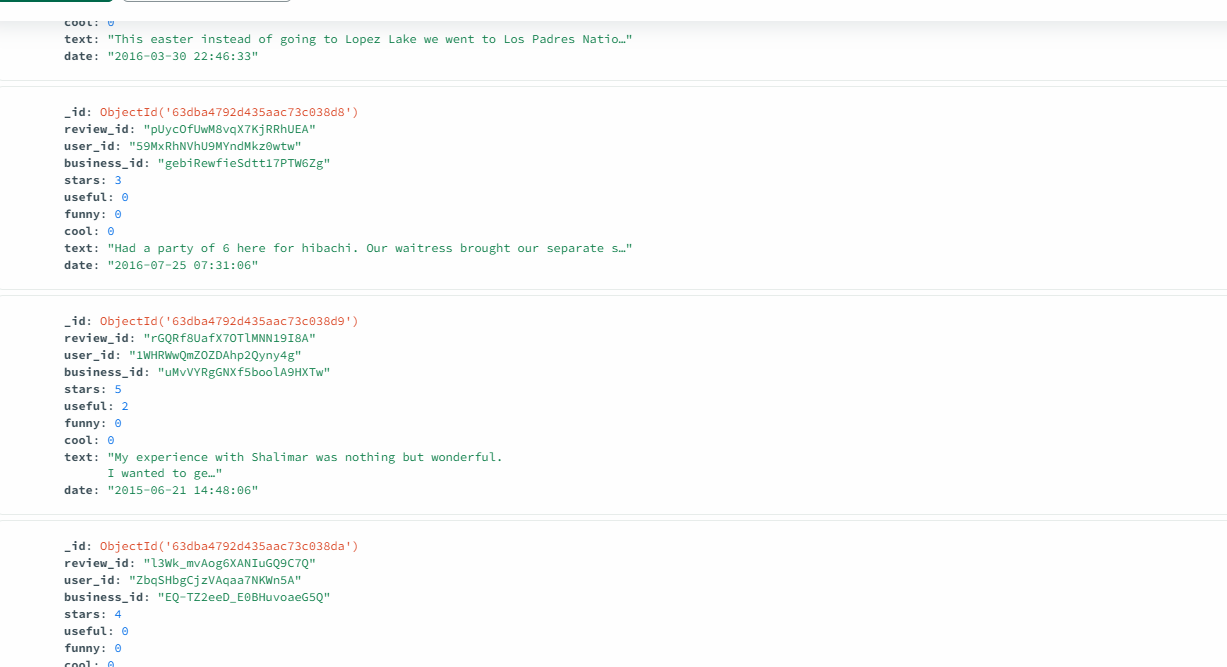

I leave below the evolution of the revised tables as a summary:

| Nombre del archivo |Nombre del dataframe|Columnas iniciales|Columnas finales|Tamaño inicial|Tamaño final|Revision inicial en|  
| --- | --- | --- | --- | --- | --- | --- |
|business.json|busi| 1 |2|119 MB|1.8 MB|Python|
|review.json|review| 9|2|5.2 GB|160 MB|Mongo db Compass|
|user.json |user|20|0|3.25 GB|0 MB|Mongo db Compass|
|checkin.json|check| 1 |2|267 MB|0 MB|Python|
|tip.json|tip| 5 |2|181 MB|13.9 MB|Python|

## Creating the main data frame. 

In [14]:
mergf_r=pd.merge(florida,review,how='inner',on='business_id')

In [15]:
mergf_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986088 entries, 0 to 986087
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   business_id         986088 non-null  object 
 1   name                986088 non-null  object 
 2   city                986088 non-null  object 
 3   postal_code         986021 non-null  object 
 4   latitude            986088 non-null  float64
 5   longitude           986088 non-null  float64
 6   attributes          955137 non-null  object 
 7   categories          985962 non-null  object 
 8   total_review_count  986088 non-null  int64  
 9   avg_rating          986088 non-null  float64
 10  stars               986088 non-null  int64  
 11  text                986088 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 97.8+ MB


In [16]:
mergf_r.head(1)

business_id            name            city postal_code  \
0  qkRM_2X51Yqxk3btlwAQIg  Temple Beth-El  St. Petersburg       33707   

   latitude  longitude attributes                           categories  \
0  27.76659 -82.732983        NaN  Synagogues, Religious Organizations   

   total_review_count  avg_rating  stars  \
0                   5         3.5      1   

                                                text  
0  Beth-El is a horribly dysfunctional place not ...

This df would be the union of the dfs from business and review. To avoid having to repeat the previous steps to get to this point of the information, I am going to save the information in a .csv file.

In [18]:
mergf_r.to_csv('flormerg.csv', index=False)

I convert the .csv into a df and continue with the review of information.

In [19]:
merge1=pd.read_csv('flormerg.csv')

In [20]:
merge1.head(1)

business_id            name            city  postal_code  \
0  qkRM_2X51Yqxk3btlwAQIg  Temple Beth-El  St. Petersburg      33707.0   

   latitude  longitude attributes                           categories  \
0  27.76659 -82.732983        NaN  Synagogues, Religious Organizations   

   total_review_count  avg_rating  stars  \
0                   5         3.5      1   

                                                text  
0  Beth-El is a horribly dysfunctional place not ...

In [21]:
merge1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986088 entries, 0 to 986087
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   business_id         986088 non-null  object 
 1   name                986088 non-null  object 
 2   city                986088 non-null  object 
 3   postal_code         986021 non-null  float64
 4   latitude            986088 non-null  float64
 5   longitude           986088 non-null  float64
 6   attributes          955137 non-null  object 
 7   categories          985962 non-null  object 
 8   total_review_count  986088 non-null  int64  
 9   avg_rating          986088 non-null  float64
 10  stars               986088 non-null  int64  
 11  text                986088 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 90.3+ MB


In [22]:
merge1.categories.unique()

array(['Synagogues, Religious Organizations',
       'Department Stores, Shopping, Fashion',
       'Vietnamese, Food, Restaurants, Food Trucks', ...,
       'Bars, Beer Bar, Nightlife, Wine Bars, Pizza, Restaurants',
       "Men's Hair Salons, Hair Salons, Barbers, Beauty & Spas",
       'Beauty & Spas, Permanent Makeup, Piercing, Tattoo'], dtype=object)

As we can see, the attributes column has many empty rows, and it needs to be completely filled because it gives us basic information about the restaurants, so I will eliminate the empty rows.

In [23]:
merge1.dropna(subset=['attributes'], inplace=True)

In [24]:
merge1.attributes.unique()

array(['{\'RestaurantsPriceRange2\': \'2\', \'BikeParking\': \'True\', \'BusinessAcceptsCreditCards\': \'True\', \'BusinessParking\': "{\'garage\': False, \'street\': False, \'validated\': False, \'lot\': False, \'valet\': False}"}',
       '{\'Alcohol\': "\'none\'", \'OutdoorSeating\': \'None\', \'RestaurantsReservations\': \'False\', \'Ambience\': "{\'touristy\': False, \'hipster\': False, \'romantic\': False, \'divey\': False, \'intimate\': False, \'trendy\': False, \'upscale\': False, \'classy\': False, \'casual\': False}", \'GoodForMeal\': "{\'dessert\': False, \'latenight\': False, \'lunch\': False, \'dinner\': False, \'brunch\': False, \'breakfast\': False}", \'BusinessParking\': "{\'garage\': False, \'street\': False, \'validated\': False, \'lot\': False, \'valet\': False}"}',
       "{'ByAppointmentOnly': 'True'}", ...,
       '{\'GoodForKids\': \'True\', \'BikeParking\': \'True\', \'RestaurantsDelivery\': \'False\', \'OutdoorSeating\': \'True\', \'RestaurantsReservations\': \

Once I know the content of the 2 columns that can give me the information of which companies can be identified as restaurants, I decide to filter the df to choose those lines of the 'categories' column that contain the substring 'Restaur'

In [25]:
C_merge1 = merge1[merge1['categories'].str.contains("Restau")]

In [26]:
C_merge1.head(1)
C_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649441 entries, 11 to 986059
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   business_id         649441 non-null  object 
 1   name                649441 non-null  object 
 2   city                649441 non-null  object 
 3   postal_code         649436 non-null  float64
 4   latitude            649441 non-null  float64
 5   longitude           649441 non-null  float64
 6   attributes          649441 non-null  object 
 7   categories          649441 non-null  object 
 8   total_review_count  649441 non-null  int64  
 9   avg_rating          649441 non-null  float64
 10  stars               649441 non-null  int64  
 11  text                649441 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 64.4+ MB


In [27]:
len(C_merge1.business_id.unique())

5847

Here we see how the more than 600,000 rows correspond to 5,847 restaurants in Florida. Now let's compare the current df with that of tip_d.

In [28]:
merged_df = C_merge1[['business_id']].merge(tip_d[['business_id']], on='business_id', how='inner')

In [29]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35968481 entries, 0 to 35968480
Data columns (total 1 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   business_id  object
dtypes: object(1)
memory usage: 548.8+ MB


As we can see, the df of tip_d does not have any information on the restaurants in Florida. So we will not merge your information with that of C_merge1. Finally to make it easier to name it, I'll rename it to data, and to avoid having to continually run through all the processing steps, I'll save the df as a .csv and then call it back to work on it as a dataframe.

In [30]:
data=C_merge1.drop(['business_id'], axis=1)
data.to_csv('data.csv', index=False)

#### Clean and complete file

In [31]:
import pandas as pd
adata=pd.read_csv('data.csv')

#### File with full rows and columns: name and comments.

This file will be useful in the restaurant recommendation system.

In [32]:
text_data=adata.drop(['city','postal_code','postal_code','longitude','latitude','attributes','categories','total_review_count','avg_rating','stars',], axis=1)

In [33]:
text_data.to_csv('tdata.csv', index=False)

# Exploratory data analysis.

#### Reviewing the file that contains the general distribution of information.

In [34]:
 pd.set_option("max_seq_item", None)

In [35]:
 adata.head(6)

name       city  postal_code   latitude  longitude  \
0  Vietnamese Food Truck  Tampa Bay      33602.0  27.955269  -82.45632   
1  Vietnamese Food Truck  Tampa Bay      33602.0  27.955269  -82.45632   
2  Vietnamese Food Truck  Tampa Bay      33602.0  27.955269  -82.45632   
3  Vietnamese Food Truck  Tampa Bay      33602.0  27.955269  -82.45632   
4  Vietnamese Food Truck  Tampa Bay      33602.0  27.955269  -82.45632   
5  Vietnamese Food Truck  Tampa Bay      33602.0  27.955269  -82.45632   

                                          attributes  \
0  {'Alcohol': "'none'", 'OutdoorSeating': 'None'...   
1  {'Alcohol': "'none'", 'OutdoorSeating': 'None'...   
2  {'Alcohol': "'none'", 'OutdoorSeating': 'None'...   
3  {'Alcohol': "'none'", 'OutdoorSeating': 'None'...   
4  {'Alcohol': "'none'", 'OutdoorSeating': 'None'...   
5  {'Alcohol': "'none'", 'OutdoorSeating': 'None'...   

                                   categories  total_review_count  avg_rating  \
0  Vietnamese, Food, Restaurants, Food Trucks                  10         4.0   
1  Vietnamese, Food, Restaurants, Food Trucks                  10         4.0   
2  Vietnamese, Food, Restaurants, Food Trucks                  10         4.0   
3  Vietnamese, Food, Restaurants, Food Trucks                  10         4.0   
4  Vietnamese, Food, Restaurants, Food Trucks                  10         4.0   
5  Vietnamese, Food, Restaurants, Food Trucks                  10         4.0   

   stars                                               text  
0      5  I eat pho about 4 times a week and from a spec...  
1      5  I've been in Wesley Chapel area for about 2 ye...  
2      3  Good tasted good - but I'm a bit confused as t...  
3      4  Ordered the chicken wings.  They were hot, fre...  
4      1  How can an order of pho take an 1 hour and 15 ...  
5      5  I ordered the beef and meatball pho & two egg ...

In [36]:
 adata['name'].unique()

array(['Vietnamese Food Truck', 'Top Shelf Sports Lounge', 'Impasto', ...,
       "Rudy's Sports Bar", 'El Cap Restaurant',
       'Colony Grill - St. Petersburg'], dtype=object)

In [37]:
# # Obtaining the unique values of each restaurant
data=adata.drop_duplicates(subset=['name'])
 #data.to_csv('udata.csv', index=False)

##### **Dataframe with unique values per restaurant.**

In [38]:
#import pandas as pd
data=pd.read_csv('udata.csv')

In [39]:
 data.city.unique()

array(['Tampa Bay', 'Wesley Chapel', 'Tampa', 'Treasure Island', 'Largo',
       'Lutz', 'Clearwater', 'Saint Petersburg', 'Brandon', 'Odessa',
       'Oldsmar', 'Spring Hill', 'Hernando Beach', 'Plant City', 'Ruskin',
       'St Petersburg', 'Palm Harbor', 'Seminole', 'Port Richey',
       'St. Petersburg', 'Riverview', 'Pinellas Park', 'Dunedin',
       'Gulfport', 'St Pete Beach', 'Apollo Beach', "Land O' Lakes",
       'Holiday', 'New Port Richey', 'St. Pete Beach', 'Clearwater Beach',
       'Seffner', 'Valrico', 'Saint Pete Beach', 'Dover', 'Wimauma',
       'Hudson', 'Trinity', 'Temple Terrace', 'NEW PORT RICHEY',
       'Tarpon Springs', 'Safety Harbor', 'Thonotosassa', 'Madeira Beach',
       'South Pasadena', 'Land O Lakes', 'Indian Rocks Beach', 'Sun City',
       'Sun City Center', 'Zephyrhills', 'Belleair Bluffs', 'Twn N Cntry',
       'Gibsonton', 'Kenneth City', 'Pinecrest West Park', 'Tierra Verde',
       'Ozona', 'Saintt Petersburg', 'Lithia', 'Palmetto',
       'Sout

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4003 entries, 0 to 4002
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                4003 non-null   object 
 1   city                4003 non-null   object 
 2   postal_code         4002 non-null   float64
 3   latitude            4003 non-null   float64
 4   longitude           4003 non-null   float64
 5   attributes          4003 non-null   object 
 6   categories          4003 non-null   object 
 7   total_review_count  4003 non-null   int64  
 8   avg_rating          4003 non-null   float64
 9   stars               4003 non-null   int64  
 10  text                4003 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 344.1+ KB


In [41]:
data.describe()

postal_code     latitude    longitude  total_review_count  \
count   4002.000000  4003.000000  4003.000000         4003.000000   
mean   33825.534233    27.978643   -82.573932          128.197352   
std      390.154303     0.156333     0.169065          197.428704   
min    33503.000000    27.564457   -82.850313            5.000000   
25%    33607.000000    27.883705   -82.728148           22.000000   
50%    33647.000000    27.963903   -82.573644           60.000000   
75%    33767.000000    28.053584   -82.453006          151.000000   
max    34698.000000    28.497700   -82.104874         3064.000000   

        avg_rating        stars  
count  4003.000000  4003.000000  
mean      3.904447     3.975518  
std       0.656285     1.345546  
min       1.000000     1.000000  
25%       3.500000     3.000000  
50%       4.000000     5.000000  
75%       4.500000     5.000000  
max       5.000000     5.000000

The std of latitude & longitude are small, that means all theses restaurants must be near each other.

In [44]:
print('There are',data.name.nunique(), 'restaurants in this dataframe')

There are 4003 restaurants in this dataframe


In [45]:
print('Distributed in',data.city.nunique(), 'cities.')

Distributed in 95 cities.


### Understanding the relationship between number of reviews and score.

In [46]:
data.stars.unique()

array([5, 4, 3, 1, 2], dtype=int64)

<AxesSubplot:xlabel='avg_rating', ylabel='total_review_count'>

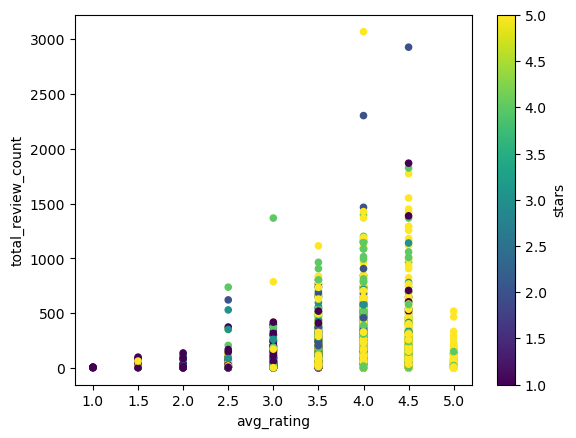

In [47]:
data.plot.scatter(x='avg_rating',y='total_review_count', c='stars',cmap='viridis')

Here we can see a first conclusion, **it seems as the preference improves as reviews number increases**

In [48]:
data.stars.value_counts()[[1,2,3,4,5]]

1     408
2     285
3     370
4     874
5    2066
Name: stars, dtype: int64

When doing the numerical verification, we see that this is not exactly the case, but we do see that **people tend to make reviews of place they care a lot**, firstable of place they liked a lot, after that, places they dislike and finally places that they don't care about.

### Understanding the relationship between location and recommendations.

To avoid duplicate information in this section, I am only going to use one data frame line per restaurant. So this section is based on the use of uvalue.

In [49]:
#!pip install folium
import folium
from folium.plugins import HeatMap

In [50]:
folium_map=folium.Map(location=[27.955269, -82.456320],zoom_start=10)
folium_map.add_child(HeatMap(data[['latitude','longitude','avg_rating']],radius=3, min_opacity=20))
folium_map

It is not clear to me the distribution of the recommendations using the heatmap, so I am going to classify the recommendations according to their average score.

In [51]:
ndata=data[['latitude','longitude','avg_rating']].copy()
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4003 entries, 0 to 4002
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    4003 non-null   float64
 1   longitude   4003 non-null   float64
 2   avg_rating  4003 non-null   float64
dtypes: float64(3)
memory usage: 93.9 KB


In [126]:
 import math

# # I use the same basemap that I used in the heatmap
mapa = folium.Map(location=[27.955269, -82.456320], zoom_start=10)

# # I create a dictionary to assign colors to each range
colors = {
     0: 'black',
     1: 'purple',
     2: 'blue',
     3: 'green',
     4: '#7FFFD4',
     5: 'yellow'
 }

 # I add the markers for each location with their average score colored in
for i, row in data.iterrows():
     score = int(math.ceil(row['avg_rating'])) # Esta redondeando hacia arriba es decir los 4.xx los lee como 5
     color = colors[min(score, 5)]
     folium.CircleMarker(
         location=[row['latitude'], row['longitude']],
         radius=3,
         popup=row['avg_rating'],
         fill=True,
         color=color,
         fill_color=color
     ).add_to(mapa)

mapa


Here I see how the restaurants with low ratings are in the same areas as those with high ratings, so the **location of the premises does not seem to be a determining factor in the number of stars a restaurant gets**.

## Relationship between attributes and recommendations.

Because it is a new section, I will recheck data

In [53]:
data.head(1)

name       city  postal_code   latitude  longitude  \
0  Vietnamese Food Truck  Tampa Bay      33602.0  27.955269  -82.45632   

                                          attributes  \
0  {'Alcohol': "'none'", 'OutdoorSeating': 'None'...   

                                   categories  total_review_count  avg_rating  \
0  Vietnamese, Food, Restaurants, Food Trucks                  10         4.0   

   stars                                               text  
0      5  I eat pho about 4 times a week and from a spec...

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4003 entries, 0 to 4002
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                4003 non-null   object 
 1   city                4003 non-null   object 
 2   postal_code         4002 non-null   float64
 3   latitude            4003 non-null   float64
 4   longitude           4003 non-null   float64
 5   attributes          4003 non-null   object 
 6   categories          4003 non-null   object 
 7   total_review_count  4003 non-null   int64  
 8   avg_rating          4003 non-null   float64
 9   stars               4003 non-null   int64  
 10  text                4003 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 344.1+ KB


In [55]:
# Check the column
print(type(data['attributes']))

<class 'pandas.core.series.Series'>


In [56]:
#Check an element of the column
print(type(data['attributes'][0]))

<class 'str'>


In [57]:
# Change str for dict
def eval_string(x):
    return eval(x)

data['attributes'] = data['attributes'].apply(eval_string)

In [58]:
# Check the change in the cell
print(type(data['attributes'][0]))

<class 'dict'>


In [59]:
# I create the df attr which is the transposition of the dicc of the attributes col
attr=pd.DataFrame(data['attributes'].to_dict()).T

In [60]:
#Checking the df
print(type(attr))
print(attr.head(1))
print(attr.info())

<class 'pandas.core.frame.DataFrame'>
  Alcohol OutdoorSeating RestaurantsReservations  \
0  'none'           None                   False   

                                            Ambience  \
0  {'touristy': False, 'hipster': False, 'romanti...   

                                         GoodForMeal  \
0  {'dessert': False, 'latenight': False, 'lunch'...   

                                     BusinessParking BestNights  \
0  {'garage': False, 'street': False, 'validated'...        NaN   

  ByAppointmentOnly GoodForDancing BusinessAcceptsCreditCards  ...  \
0               NaN            NaN                        NaN  ...   

  RestaurantsTakeOut GoodForKids Corkage RestaurantsDelivery BYOBCorkage  \
0                NaN         NaN     NaN                 NaN         NaN   

  AcceptsInsurance RestaurantsCounterService AgesAllowed HairSpecializesIn  \
0              NaN                       NaN         NaN               NaN   

  DietaryRestrictions  
0                 NaN

In [61]:
# I review an element of the new df attr
print(type(attr['Ambience'][0]))

<class 'str'>


In [62]:
# I change again from str to dict
def apply_eval(x):
    if isinstance(x, str):
        return eval(x)
    else:
        return x
attr = attr.applymap(apply_eval)

In [63]:
# check the change
print(type(attr['Ambience'][0]))

<class 'dict'>


In [64]:
# I check which columns have dict
columns_with_dict = [col for col in attr.columns if attr[col].apply(lambda x: isinstance(x, dict)).any()]

In [65]:
columns_with_dict

['Ambience',
 'GoodForMeal',
 'BusinessParking',
 'BestNights',
 'Music',
 'HairSpecializesIn',
 'DietaryRestrictions']

In [66]:
#Create new columns out of  the columns with dict
for column_w_d in columns_with_dict:
     new_df = pd.DataFrame(attr[column_w_d].to_dict()).T
     new_df.columns = [column_w_d + '_' + str(col) for col in new_df.columns]
     attr = attr.join(new_df)
attr.head(1)

Alcohol OutdoorSeating RestaurantsReservations  \
0    none           None                   False   

                                            Ambience  \
0  {'touristy': False, 'hipster': False, 'romanti...   

                                         GoodForMeal  \
0  {'dessert': False, 'latenight': False, 'lunch'...   

                                     BusinessParking BestNights  \
0  {'garage': False, 'street': False, 'validated'...        NaN   

  ByAppointmentOnly GoodForDancing BusinessAcceptsCreditCards  ...  \
0               NaN            NaN                        NaN  ...   

  HairSpecializesIn_kids HairSpecializesIn_perms  \
0                    NaN                     NaN   

  HairSpecializesIn_straightperms DietaryRestrictions_dairy-free  \
0                             NaN                            NaN   

  DietaryRestrictions_gluten-free DietaryRestrictions_halal  \
0                             NaN                       NaN   

   DietaryRestrictions_kosher DietaryRestrictions_soy-free  \
0                         NaN                          NaN   

  DietaryRestrictions_vegan DietaryRestrictions_vegetarian  
0                       NaN                            NaN  

[1 rows x 87 columns]

In [68]:
# I check the names of all the columns
columnas = list(attr.columns.values)
print(columnas)

['Alcohol', 'OutdoorSeating', 'RestaurantsReservations', 'Ambience', 'GoodForMeal', 'BusinessParking', 'BestNights', 'ByAppointmentOnly', 'GoodForDancing', 'BusinessAcceptsCreditCards', 'HappyHour', 'RestaurantsAttire', 'Smoking', 'BikeParking', 'CoatCheck', 'HasTV', 'RestaurantsPriceRange2', 'RestaurantsGoodForGroups', 'Music', 'RestaurantsTableService', 'BYOB', 'WiFi', 'DogsAllowed', 'Caters', 'WheelchairAccessible', 'NoiseLevel', 'DriveThru', 'BusinessAcceptsBitcoin', 'RestaurantsTakeOut', 'GoodForKids', 'Corkage', 'RestaurantsDelivery', 'BYOBCorkage', 'AcceptsInsurance', 'RestaurantsCounterService', 'AgesAllowed', 'HairSpecializesIn', 'DietaryRestrictions', 'Ambience_touristy', 'Ambience_hipster', 'Ambience_romantic', 'Ambience_divey', 'Ambience_intimate', 'Ambience_trendy', 'Ambience_upscale', 'Ambience_classy', 'Ambience_casual', 'GoodForMeal_dessert', 'GoodForMeal_latenight', 'GoodForMeal_lunch', 'GoodForMeal_dinner', 'GoodForMeal_brunch', 'GoodForMeal_breakfast', 'BusinessParki

In [69]:
# I remove the columns with dictionaries
attr.drop(['Ambience','GoodForMeal','BusinessParking','BestNights','Music','HairSpecializesIn','DietaryRestrictions'], axis=1, inplace=True)

In [70]:
# I check the df
attr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4003 entries, 0 to 4002
Data columns (total 80 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Alcohol                            3049 non-null   object 
 1   OutdoorSeating                     3081 non-null   object 
 2   RestaurantsReservations            3084 non-null   object 
 3   ByAppointmentOnly                  403 non-null    object 
 4   GoodForDancing                     400 non-null    object 
 5   BusinessAcceptsCreditCards         3549 non-null   object 
 6   HappyHour                          1418 non-null   object 
 7   RestaurantsAttire                  2563 non-null   object 
 8   Smoking                            427 non-null    object 
 9   BikeParking                        3015 non-null   object 
 10  CoatCheck                          483 non-null    object 
 11  HasTV                              3259 non-null   objec

In [71]:
#I make one of the two df
data=data.join(attr)

In [72]:
#I check the unified df
data.head(1)

name       city  postal_code   latitude  longitude  \
0  Vietnamese Food Truck  Tampa Bay      33602.0  27.955269  -82.45632   

                                          attributes  \
0  {'Alcohol': ''none'', 'OutdoorSeating': 'None'...   

                                   categories  total_review_count  avg_rating  \
0  Vietnamese, Food, Restaurants, Food Trucks                  10         4.0   

   stars  ... HairSpecializesIn_kids HairSpecializesIn_perms  \
0      5  ...                    NaN                     NaN   

  HairSpecializesIn_straightperms DietaryRestrictions_dairy-free  \
0                             NaN                            NaN   

  DietaryRestrictions_gluten-free DietaryRestrictions_halal  \
0                             NaN                       NaN   

  DietaryRestrictions_kosher DietaryRestrictions_soy-free  \
0                        NaN                          NaN   

  DietaryRestrictions_vegan DietaryRestrictions_vegetarian  
0                       NaN                            NaN  

[1 rows x 91 columns]

In [73]:
#I remove the column attributes
data.drop(['attributes'], axis=1, inplace=True)

In [74]:
pd.options.display.max_columns = None

In [75]:
#Check the df
data.head(1)

name       city  postal_code   latitude  longitude  \
0  Vietnamese Food Truck  Tampa Bay      33602.0  27.955269  -82.45632   

                                   categories  total_review_count  avg_rating  \
0  Vietnamese, Food, Restaurants, Food Trucks                  10         4.0   

   stars                                               text Alcohol  \
0      5  I eat pho about 4 times a week and from a spec...    none   

  OutdoorSeating RestaurantsReservations ByAppointmentOnly GoodForDancing  \
0           None                   False               NaN            NaN   

  BusinessAcceptsCreditCards HappyHour RestaurantsAttire Smoking BikeParking  \
0                        NaN       NaN               NaN     NaN         NaN   

  CoatCheck HasTV  RestaurantsPriceRange2 RestaurantsGoodForGroups  \
0       NaN   NaN                     NaN                      NaN   

  RestaurantsTableService BYOB WiFi DogsAllowed Caters WheelchairAccessible  \
0                     NaN  NaN  NaN         NaN    NaN                  NaN   

  NoiseLevel DriveThru BusinessAcceptsBitcoin RestaurantsTakeOut GoodForKids  \
0        NaN       NaN                    NaN                NaN         NaN   

  Corkage RestaurantsDelivery BYOBCorkage AcceptsInsurance  \
0     NaN                 NaN         NaN              NaN   

  RestaurantsCounterService AgesAllowed Ambience_touristy Ambience_hipster  \
0                       NaN         NaN             False            False   

  Ambience_romantic Ambience_divey Ambience_intimate Ambience_trendy  \
0             False          False             False           False   

  Ambience_upscale Ambience_classy Ambience_casual GoodForMeal_dessert  \
0            False           False           False               False   

  GoodForMeal_latenight GoodForMeal_lunch GoodForMeal_dinner  \
0                 False             False              False   

  GoodForMeal_brunch GoodForMeal_breakfast BusinessParking_garage  \
0              False                 False                  False   

  BusinessParking_street BusinessParking_validated BusinessParking_lot  \
0                  False                     False               False   

  BusinessParking_valet BestNights_monday BestNights_tuesday  \
0                 False               NaN                NaN   

  BestNights_friday BestNights_wednesday BestNights_thursday  \
0               NaN                  NaN                 NaN   

  BestNights_sunday BestNights_saturday Music_dj Music_background_music  \
0               NaN                 NaN      NaN                    NaN   

  Music_no_music Music_jukebox Music_live Music_video Music_karaoke  \
0            NaN           NaN        NaN         NaN           NaN   

  HairSpecializesIn_africanamerican HairSpecializesIn_asian  \
0                               NaN                     NaN   

  HairSpecializesIn_coloring HairSpecializesIn_curly  \
0                        NaN                     NaN   

  HairSpecializesIn_extensions HairSpecializesIn_kids HairSpecializesIn_perms  \
0                          NaN                    NaN                     NaN   

  HairSpecializesIn_straightperms DietaryRestrictions_dairy-free  \
0                             NaN                            NaN   

  DietaryRestrictions_gluten-free DietaryRestrictions_halal  \
0                             NaN                       NaN   

  DietaryRestrictions_kosher DietaryRestrictions_soy-free  \
0                        NaN                          NaN   

  DietaryRestrictions_vegan DietaryRestrictions_vegetarian  
0                       NaN                            NaN

In [76]:
#Removing everything that is not related to name of the restaurant or its attributes
datat = data.drop(['city','postal_code','latitude','longitude','categories','total_review_count','stars','text'], axis=1)

In [77]:
datat.head(1)

name  avg_rating Alcohol OutdoorSeating  \
0  Vietnamese Food Truck         4.0    none           None   

  RestaurantsReservations ByAppointmentOnly GoodForDancing  \
0                   False               NaN            NaN   

  BusinessAcceptsCreditCards HappyHour RestaurantsAttire Smoking BikeParking  \
0                        NaN       NaN               NaN     NaN         NaN   

  CoatCheck HasTV  RestaurantsPriceRange2 RestaurantsGoodForGroups  \
0       NaN   NaN                     NaN                      NaN   

  RestaurantsTableService BYOB WiFi DogsAllowed Caters WheelchairAccessible  \
0                     NaN  NaN  NaN         NaN    NaN                  NaN   

  NoiseLevel DriveThru BusinessAcceptsBitcoin RestaurantsTakeOut GoodForKids  \
0        NaN       NaN                    NaN                NaN         NaN   

  Corkage RestaurantsDelivery BYOBCorkage AcceptsInsurance  \
0     NaN                 NaN         NaN              NaN   

  RestaurantsCounterService AgesAllowed Ambience_touristy Ambience_hipster  \
0                       NaN         NaN             False            False   

  Ambience_romantic Ambience_divey Ambience_intimate Ambience_trendy  \
0             False          False             False           False   

  Ambience_upscale Ambience_classy Ambience_casual GoodForMeal_dessert  \
0            False           False           False               False   

  GoodForMeal_latenight GoodForMeal_lunch GoodForMeal_dinner  \
0                 False             False              False   

  GoodForMeal_brunch GoodForMeal_breakfast BusinessParking_garage  \
0              False                 False                  False   

  BusinessParking_street BusinessParking_validated BusinessParking_lot  \
0                  False                     False               False   

  BusinessParking_valet BestNights_monday BestNights_tuesday  \
0                 False               NaN                NaN   

  BestNights_friday BestNights_wednesday BestNights_thursday  \
0               NaN                  NaN                 NaN   

  BestNights_sunday BestNights_saturday Music_dj Music_background_music  \
0               NaN                 NaN      NaN                    NaN   

  Music_no_music Music_jukebox Music_live Music_video Music_karaoke  \
0            NaN           NaN        NaN         NaN           NaN   

  HairSpecializesIn_africanamerican HairSpecializesIn_asian  \
0                               NaN                     NaN   

  HairSpecializesIn_coloring HairSpecializesIn_curly  \
0                        NaN                     NaN   

  HairSpecializesIn_extensions HairSpecializesIn_kids HairSpecializesIn_perms  \
0                          NaN                    NaN                     NaN   

  HairSpecializesIn_straightperms DietaryRestrictions_dairy-free  \
0                             NaN                            NaN   

  DietaryRestrictions_gluten-free DietaryRestrictions_halal  \
0                             NaN                       NaN   

  DietaryRestrictions_kosher DietaryRestrictions_soy-free  \
0                        NaN                          NaN   

  DietaryRestrictions_vegan DietaryRestrictions_vegetarian  
0                       NaN                            NaN

#### Attributes of 5 stars restaurants.

In [78]:
data5=datat[datat['avg_rating']==5]

In [79]:
data5.head(1)

name  avg_rating Alcohol OutdoorSeating RestaurantsReservations  \
2  Impasto         5.0     NaN            NaN                     NaN   

  ByAppointmentOnly GoodForDancing BusinessAcceptsCreditCards HappyHour  \
2               NaN            NaN                       True       NaN   

  RestaurantsAttire Smoking BikeParking CoatCheck HasTV  \
2               NaN     NaN         NaN       NaN   NaN   

   RestaurantsPriceRange2 RestaurantsGoodForGroups RestaurantsTableService  \
2                     NaN                      NaN                     NaN   

  BYOB WiFi DogsAllowed Caters WheelchairAccessible NoiseLevel DriveThru  \
2  NaN  NaN         NaN   True                  NaN        NaN       NaN   

  BusinessAcceptsBitcoin RestaurantsTakeOut GoodForKids Corkage  \
2                    NaN               True         NaN     NaN   

  RestaurantsDelivery BYOBCorkage AcceptsInsurance RestaurantsCounterService  \
2               False         NaN              NaN                       NaN   

  AgesAllowed Ambience_touristy Ambience_hipster Ambience_romantic  \
2         NaN               NaN              NaN               NaN   

  Ambience_divey Ambience_intimate Ambience_trendy Ambience_upscale  \
2            NaN               NaN             NaN              NaN   

  Ambience_classy Ambience_casual GoodForMeal_dessert GoodForMeal_latenight  \
2             NaN             NaN                 NaN                   NaN   

  GoodForMeal_lunch GoodForMeal_dinner GoodForMeal_brunch  \
2               NaN                NaN                NaN   

  GoodForMeal_breakfast BusinessParking_garage BusinessParking_street  \
2                   NaN                    NaN                    NaN   

  BusinessParking_validated BusinessParking_lot BusinessParking_valet  \
2                       NaN                 NaN                   NaN   

  BestNights_monday BestNights_tuesday BestNights_friday BestNights_wednesday  \
2               NaN                NaN               NaN                  NaN   

  BestNights_thursday BestNights_sunday BestNights_saturday Music_dj  \
2                 NaN               NaN                 NaN      NaN   

  Music_background_music Music_no_music Music_jukebox Music_live Music_video  \
2                    NaN            NaN           NaN        NaN         NaN   

  Music_karaoke HairSpecializesIn_africanamerican HairSpecializesIn_asian  \
2           NaN                               NaN                     NaN   

  HairSpecializesIn_coloring HairSpecializesIn_curly  \
2                        NaN                     NaN   

  HairSpecializesIn_extensions HairSpecializesIn_kids HairSpecializesIn_perms  \
2                          NaN                    NaN                     NaN   

  HairSpecializesIn_straightperms DietaryRestrictions_dairy-free  \
2                             NaN                            NaN   

  DietaryRestrictions_gluten-free DietaryRestrictions_halal  \
2                             NaN                       NaN   

  DietaryRestrictions_kosher DietaryRestrictions_soy-free  \
2                        NaN                          NaN   

  DietaryRestrictions_vegan DietaryRestrictions_vegetarian  
2                       NaN                            NaN

In [80]:
#Creating a list for each row where I keep track of all the columns that have a True in a attribute
list_li5=data5.apply(lambda row: [col for col in data5.columns[1:] if row[col] == True], axis=1)

In [81]:
#Making them join in a single list.
import itertools

list_uni = list(itertools.chain.from_iterable(list_li5))

print(list_uni)

['BusinessAcceptsCreditCards', 'Caters', 'RestaurantsTakeOut', 'OutdoorSeating', 'BusinessAcceptsCreditCards', 'BikeParking', 'HasTV', 'Caters', 'WheelchairAccessible', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'RestaurantsTakeOut', 'GoodForKids', 'RestaurantsDelivery', 'HasTV', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'RestaurantsTakeOut', 'BusinessAcceptsCreditCards', 'BikeParking', 'HasTV', 'RestaurantsPriceRange2', 'WheelchairAccessible', 'RestaurantsTakeOut', 'BusinessParking_lot', 'OutdoorSeating', 'Caters', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'RestaurantsDelivery', 'OutdoorSeating', 'HasTV', 'Caters', 'WheelchairAccessible', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'OutdoorSeating', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'BusinessAcceptsCreditCards', 'BikeParking', 'Caters', 'WheelchairAccessible', 'RestaurantsTakeOut', 'OutdoorSeating', 'RestaurantsReservations', 'BusinessAcceptsCreditCards', 'BikeParking', 'HasTV', 'RestaurantsPriceRange2', 'Restauran

In [82]:
#Checking their frequency
frecuency5 = {}

for word in list_uni:
    if word in frecuency5:
        frecuency5[word] += 1
    else:
        frecuency5[word] = 1
print(frecuency5)

{'BusinessAcceptsCreditCards': 174, 'Caters': 110, 'RestaurantsTakeOut': 191, 'OutdoorSeating': 91, 'BikeParking': 107, 'HasTV': 91, 'WheelchairAccessible': 110, 'RestaurantsDelivery': 120, 'GoodForKids': 62, 'RestaurantsPriceRange2': 51, 'BusinessParking_lot': 95, 'RestaurantsReservations': 35, 'RestaurantsTableService': 55, 'DogsAllowed': 43, 'Ambience_classy': 18, 'Ambience_casual': 38, 'GoodForMeal_lunch': 21, 'GoodForMeal_brunch': 8, 'GoodForMeal_breakfast': 9, 'BusinessParking_garage': 8, 'BusinessParking_street': 39, 'BYOB': 16, 'Corkage': 9, 'Ambience_divey': 2, 'RestaurantsGoodForGroups': 42, 'HappyHour': 17, 'BusinessParking_valet': 1, 'Music_live': 5, 'Ambience_intimate': 5, 'GoodForMeal_dinner': 13, 'Ambience_romantic': 1, 'GoodForMeal_dessert': 4, 'DriveThru': 2, 'ByAppointmentOnly': 2, 'BusinessAcceptsBitcoin': 3, 'AcceptsInsurance': 1, 'Ambience_trendy': 3, 'BusinessParking_validated': 2, 'BestNights_saturday': 2, 'Ambience_hipster': 2}


In [83]:
#!pip install wordcloud

In [84]:
import matplotlib.pyplot as plt
#Create wordclouds
from wordcloud import WordCloud

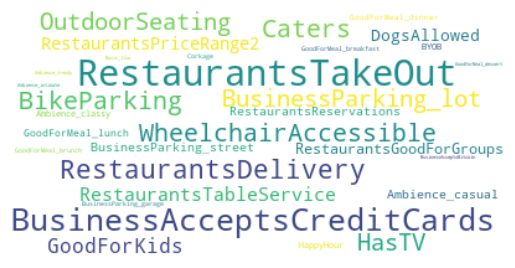

In [85]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frecuency5)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [86]:
count_att5 = pd.DataFrame([[key, frecuency5[key]] for key in frecuency5.keys()], columns=['Name', 'Amount'])
top5=count_att5.sort_values('Amount',ascending=False).head()
top5

Name  Amount
2          RestaurantsTakeOut     191
0  BusinessAcceptsCreditCards     174
7         RestaurantsDelivery     120
1                      Caters     110
6        WheelchairAccessible     110

As the word cloud seems to be very diffuse I decided to make a table with the most repeated attributes.

#### Attributes of restaurants between 4.0 & 4.9 stars

In [87]:
data4=datat.loc[(datat['avg_rating'] >= 4.0) & (datat['avg_rating'] <= 4.9)]

In [88]:
data4.head(1)

name  avg_rating Alcohol OutdoorSeating  \
0  Vietnamese Food Truck         4.0    none           None   

  RestaurantsReservations ByAppointmentOnly GoodForDancing  \
0                   False               NaN            NaN   

  BusinessAcceptsCreditCards HappyHour RestaurantsAttire Smoking BikeParking  \
0                        NaN       NaN               NaN     NaN         NaN   

  CoatCheck HasTV  RestaurantsPriceRange2 RestaurantsGoodForGroups  \
0       NaN   NaN                     NaN                      NaN   

  RestaurantsTableService BYOB WiFi DogsAllowed Caters WheelchairAccessible  \
0                     NaN  NaN  NaN         NaN    NaN                  NaN   

  NoiseLevel DriveThru BusinessAcceptsBitcoin RestaurantsTakeOut GoodForKids  \
0        NaN       NaN                    NaN                NaN         NaN   

  Corkage RestaurantsDelivery BYOBCorkage AcceptsInsurance  \
0     NaN                 NaN         NaN              NaN   

  RestaurantsCounterService AgesAllowed Ambience_touristy Ambience_hipster  \
0                       NaN         NaN             False            False   

  Ambience_romantic Ambience_divey Ambience_intimate Ambience_trendy  \
0             False          False             False           False   

  Ambience_upscale Ambience_classy Ambience_casual GoodForMeal_dessert  \
0            False           False           False               False   

  GoodForMeal_latenight GoodForMeal_lunch GoodForMeal_dinner  \
0                 False             False              False   

  GoodForMeal_brunch GoodForMeal_breakfast BusinessParking_garage  \
0              False                 False                  False   

  BusinessParking_street BusinessParking_validated BusinessParking_lot  \
0                  False                     False               False   

  BusinessParking_valet BestNights_monday BestNights_tuesday  \
0                 False               NaN                NaN   

  BestNights_friday BestNights_wednesday BestNights_thursday  \
0               NaN                  NaN                 NaN   

  BestNights_sunday BestNights_saturday Music_dj Music_background_music  \
0               NaN                 NaN      NaN                    NaN   

  Music_no_music Music_jukebox Music_live Music_video Music_karaoke  \
0            NaN           NaN        NaN         NaN           NaN   

  HairSpecializesIn_africanamerican HairSpecializesIn_asian  \
0                               NaN                     NaN   

  HairSpecializesIn_coloring HairSpecializesIn_curly  \
0                        NaN                     NaN   

  HairSpecializesIn_extensions HairSpecializesIn_kids HairSpecializesIn_perms  \
0                          NaN                    NaN                     NaN   

  HairSpecializesIn_straightperms DietaryRestrictions_dairy-free  \
0                             NaN                            NaN   

  DietaryRestrictions_gluten-free DietaryRestrictions_halal  \
0                             NaN                       NaN   

  DietaryRestrictions_kosher DietaryRestrictions_soy-free  \
0                        NaN                          NaN   

  DietaryRestrictions_vegan DietaryRestrictions_vegetarian  
0                       NaN                            NaN

In [89]:
list_li4=data4.apply(lambda row: [col for col in data4.columns[1:] if row[col] == True], axis=1)


In [90]:
#import itertools

list_uni = list(itertools.chain.from_iterable(list_li4))

print(list_uni)

['RestaurantsReservations', 'BusinessAcceptsCreditCards', 'HappyHour', 'BikeParking', 'HasTV', 'RestaurantsGoodForGroups', 'RestaurantsTableService', 'Caters', 'WheelchairAccessible', 'RestaurantsTakeOut', 'Corkage', 'RestaurantsDelivery', 'Ambience_casual', 'GoodForMeal_dinner', 'OutdoorSeating', 'RestaurantsReservations', 'BusinessAcceptsCreditCards', 'BikeParking', 'RestaurantsGoodForGroups', 'RestaurantsTableService', 'Caters', 'WheelchairAccessible', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'Ambience_classy', 'GoodForMeal_dinner', 'OutdoorSeating', 'BusinessAcceptsCreditCards', 'RestaurantsTableService', 'Caters', 'WheelchairAccessible', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'RestaurantsTableService', 'WheelchairAccessible', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'OutdoorSeating', 'GoodForDancing', 'BusinessAcceptsCreditCards', 'BikeParking', 'HasTV', 'RestaurantsGoodForGroups', 'DogsAllowed', 'Caters', 'RestaurantsTakeOut', 'GoodForKids', 'Ambience_casual', 'Good

In [91]:
frecuency4 = {}

for word in list_uni:
    if word in frecuency4:
        frecuency4[word] += 1
    else:
        frecuency4[word] = 1
print(frecuency4)

{'RestaurantsReservations': 701, 'BusinessAcceptsCreditCards': 2088, 'HappyHour': 533, 'BikeParking': 1515, 'HasTV': 1553, 'RestaurantsGoodForGroups': 1498, 'RestaurantsTableService': 1018, 'Caters': 1202, 'WheelchairAccessible': 1082, 'RestaurantsTakeOut': 2043, 'Corkage': 159, 'RestaurantsDelivery': 1305, 'Ambience_casual': 1188, 'GoodForMeal_dinner': 891, 'OutdoorSeating': 1172, 'Ambience_classy': 442, 'GoodForDancing': 20, 'DogsAllowed': 410, 'GoodForKids': 1455, 'GoodForMeal_latenight': 59, 'BusinessParking_street': 492, 'BestNights_friday': 173, 'BestNights_wednesday': 38, 'BestNights_saturday': 169, 'Music_live': 113, 'GoodForMeal_lunch': 933, 'GoodForMeal_brunch': 231, 'GoodForMeal_breakfast': 200, 'RestaurantsPriceRange2': 714, 'BusinessParking_lot': 1360, 'Ambience_trendy': 195, 'GoodForMeal_dessert': 142, 'Ambience_hipster': 69, 'BestNights_thursday': 60, 'BusinessParking_valet': 82, 'BYOB': 97, 'Ambience_romantic': 43, 'BusinessAcceptsBitcoin': 21, 'Ambience_intimate': 60, 

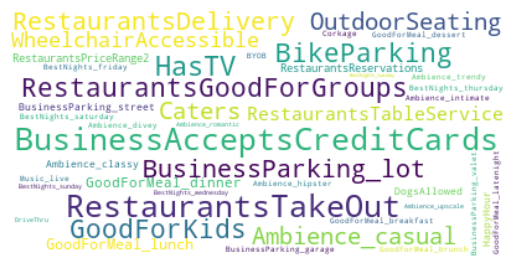

In [92]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frecuency4)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [93]:
count_att4 = pd.DataFrame([[key, frecuency4[key]] for key in frecuency4.keys()], columns=['Name', 'Amount'])
top4=count_att4.sort_values('Amount',ascending=False).head()
top4

Name  Amount
1  BusinessAcceptsCreditCards    2088
9          RestaurantsTakeOut    2043
4                       HasTV    1553
3                 BikeParking    1515
5    RestaurantsGoodForGroups    1498

Once again, the word cloud seems to be very diffuse, so I decided to make a table with the most repeated attributes in the rest of the scores.

### **Attributes of restaurants between 3.0 y 3.9**

In [94]:
data3=datat.loc[(datat['avg_rating'] >= 3.0) & (datat['avg_rating'] <= 3.9)]

In [95]:
data3.head(1)

name  avg_rating Alcohol OutdoorSeating  \
4  Chipotle Mexican Grill         3.0    none           True   

  RestaurantsReservations ByAppointmentOnly GoodForDancing  \
4                   False               NaN            NaN   

  BusinessAcceptsCreditCards HappyHour RestaurantsAttire Smoking BikeParking  \
4                       True       NaN            casual     NaN        True   

  CoatCheck HasTV  RestaurantsPriceRange2 RestaurantsGoodForGroups  \
4       NaN  True                     1.0                    False   

  RestaurantsTableService BYOB  WiFi DogsAllowed Caters WheelchairAccessible  \
4                   False  NaN  free         NaN   True                  NaN   

  NoiseLevel DriveThru BusinessAcceptsBitcoin RestaurantsTakeOut GoodForKids  \
4    average      True                    NaN               True        True   

  Corkage RestaurantsDelivery BYOBCorkage AcceptsInsurance  \
4     NaN                True         NaN              NaN   

  RestaurantsCounterService AgesAllowed Ambience_touristy Ambience_hipster  \
4                       NaN         NaN             False            False   

  Ambience_romantic Ambience_divey Ambience_intimate Ambience_trendy  \
4             False          False             False           False   

  Ambience_upscale Ambience_classy Ambience_casual GoodForMeal_dessert  \
4            False           False           False               False   

  GoodForMeal_latenight GoodForMeal_lunch GoodForMeal_dinner  \
4                 False              True              False   

  GoodForMeal_brunch GoodForMeal_breakfast BusinessParking_garage  \
4              False                 False                  False   

  BusinessParking_street BusinessParking_validated BusinessParking_lot  \
4                  False                     False                True   

  BusinessParking_valet BestNights_monday BestNights_tuesday  \
4                 False               NaN                NaN   

  BestNights_friday BestNights_wednesday BestNights_thursday  \
4               NaN                  NaN                 NaN   

  BestNights_sunday BestNights_saturday Music_dj Music_background_music  \
4               NaN                 NaN      NaN                    NaN   

  Music_no_music Music_jukebox Music_live Music_video Music_karaoke  \
4            NaN           NaN        NaN         NaN           NaN   

  HairSpecializesIn_africanamerican HairSpecializesIn_asian  \
4                               NaN                     NaN   

  HairSpecializesIn_coloring HairSpecializesIn_curly  \
4                        NaN                     NaN   

  HairSpecializesIn_extensions HairSpecializesIn_kids HairSpecializesIn_perms  \
4                          NaN                    NaN                     NaN   

  HairSpecializesIn_straightperms DietaryRestrictions_dairy-free  \
4                             NaN                            NaN   

  DietaryRestrictions_gluten-free DietaryRestrictions_halal  \
4                             NaN                       NaN   

  DietaryRestrictions_kosher DietaryRestrictions_soy-free  \
4                        NaN                          NaN   

  DietaryRestrictions_vegan DietaryRestrictions_vegetarian  
4                       NaN                            NaN

In [96]:
list_li3=data3.apply(lambda row: [col for col in data3.columns[1:] if row[col] == True], axis=1)

In [97]:
#import itertools

list_uni = list(itertools.chain.from_iterable(list_li3))

print(list_uni)

['OutdoorSeating', 'BusinessAcceptsCreditCards', 'BikeParking', 'HasTV', 'RestaurantsPriceRange2', 'Caters', 'DriveThru', 'RestaurantsTakeOut', 'GoodForKids', 'RestaurantsDelivery', 'GoodForMeal_lunch', 'BusinessParking_lot', 'BusinessAcceptsCreditCards', 'Caters', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'BusinessAcceptsCreditCards', 'BikeParking', 'HasTV', 'DogsAllowed', 'Caters', 'WheelchairAccessible', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'BusinessAcceptsCreditCards', 'BikeParking', 'HasTV', 'RestaurantsPriceRange2', 'RestaurantsGoodForGroups', 'Caters', 'RestaurantsTakeOut', 'GoodForKids', 'RestaurantsDelivery', 'Ambience_casual', 'GoodForMeal_lunch', 'GoodForMeal_breakfast', 'BusinessParking_street', 'BusinessParking_lot', 'HasTV', 'RestaurantsTableService', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'Ambience_classy', 'RestaurantsReservations', 'BusinessAcceptsCreditCards', 'HappyHour', 'BikeParking', 'HasTV', 'RestaurantsGoodForGroups', 'RestaurantsTableService', 

In [98]:
frecuency3 = {}

for word in list_uni:
    if word in frecuency3:
        frecuency3[word] += 1
    else:
        frecuency3[word] = 1
print(frecuency3)

{'OutdoorSeating': 557, 'BusinessAcceptsCreditCards': 1022, 'BikeParking': 703, 'HasTV': 860, 'RestaurantsPriceRange2': 340, 'Caters': 451, 'DriveThru': 28, 'RestaurantsTakeOut': 993, 'GoodForKids': 769, 'RestaurantsDelivery': 628, 'GoodForMeal_lunch': 442, 'BusinessParking_lot': 619, 'DogsAllowed': 122, 'WheelchairAccessible': 365, 'RestaurantsGoodForGroups': 818, 'Ambience_casual': 564, 'GoodForMeal_breakfast': 68, 'BusinessParking_street': 141, 'RestaurantsTableService': 424, 'Ambience_classy': 152, 'RestaurantsReservations': 355, 'HappyHour': 342, 'BYOB': 14, 'Corkage': 40, 'GoodForMeal_dinner': 431, 'BestNights_monday': 29, 'BestNights_friday': 116, 'BestNights_thursday': 44, 'BestNights_sunday': 46, 'BestNights_saturday': 118, 'Ambience_trendy': 46, 'GoodForMeal_latenight': 39, 'GoodForMeal_dessert': 51, 'Music_live': 121, 'Ambience_upscale': 10, 'GoodForMeal_brunch': 71, 'BusinessParking_garage': 79, 'BusinessParking_validated': 17, 'BusinessParking_valet': 68, 'Ambience_divey':

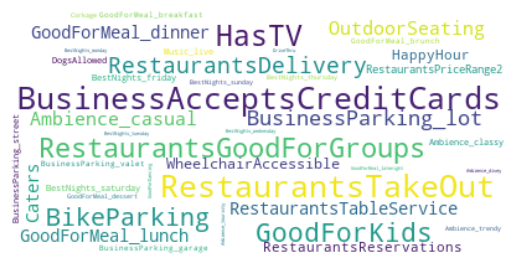

In [99]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frecuency3)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [100]:
count_att3 = pd.DataFrame([[key, frecuency3[key]] for key in frecuency3.keys()], columns=['Name', 'Amount'])
top3=count_att3.sort_values('Amount',ascending=False).head()
top3

Name  Amount
1   BusinessAcceptsCreditCards    1022
7           RestaurantsTakeOut     993
3                        HasTV     860
14    RestaurantsGoodForGroups     818
8                  GoodForKids     769

### **Attributes of restaurants between 1.0 y 2.9 stars**

In [101]:
data2=datat.loc[(datat['avg_rating'] >= 0.0) & (datat['avg_rating'] <= 2.9)]

In [102]:
data2.head(1)

name  avg_rating Alcohol OutdoorSeating RestaurantsReservations  \
10  Cafe Con Leche         2.5     NaN          False                   False   

   ByAppointmentOnly GoodForDancing BusinessAcceptsCreditCards HappyHour  \
10               NaN            NaN                       True       NaN   

   RestaurantsAttire Smoking BikeParking CoatCheck HasTV  \
10            casual     NaN       False       NaN  True   

    RestaurantsPriceRange2 RestaurantsGoodForGroups RestaurantsTableService  \
10                     1.0                    False                   False   

   BYOB  WiFi DogsAllowed Caters WheelchairAccessible NoiseLevel DriveThru  \
10  NaN  free       False  False                  NaN        NaN       NaN   

   BusinessAcceptsBitcoin RestaurantsTakeOut GoodForKids Corkage  \
10                    NaN               True        True     NaN   

   RestaurantsDelivery BYOBCorkage AcceptsInsurance RestaurantsCounterService  \
10                True         NaN              NaN                       NaN   

   AgesAllowed Ambience_touristy Ambience_hipster Ambience_romantic  \
10         NaN             False            False             False   

   Ambience_divey Ambience_intimate Ambience_trendy Ambience_upscale  \
10          False             False           False            False   

   Ambience_classy Ambience_casual GoodForMeal_dessert GoodForMeal_latenight  \
10           False           False               False                 False   

   GoodForMeal_lunch GoodForMeal_dinner GoodForMeal_brunch  \
10             False              False              False   

   GoodForMeal_breakfast BusinessParking_garage BusinessParking_street  \
10                 False                   None                  False   

   BusinessParking_validated BusinessParking_lot BusinessParking_valet  \
10                     False                None                 False   

   BestNights_monday BestNights_tuesday BestNights_friday  \
10               NaN                NaN               NaN   

   BestNights_wednesday BestNights_thursday BestNights_sunday  \
10                  NaN                 NaN               NaN   

   BestNights_saturday Music_dj Music_background_music Music_no_music  \
10                 NaN      NaN                    NaN            NaN   

   Music_jukebox Music_live Music_video Music_karaoke  \
10           NaN        NaN         NaN           NaN   

   HairSpecializesIn_africanamerican HairSpecializesIn_asian  \
10                               NaN                     NaN   

   HairSpecializesIn_coloring HairSpecializesIn_curly  \
10                        NaN                     NaN   

   HairSpecializesIn_extensions HairSpecializesIn_kids  \
10                          NaN                    NaN   

   HairSpecializesIn_perms HairSpecializesIn_straightperms  \
10                     NaN                             NaN   

   DietaryRestrictions_dairy-free DietaryRestrictions_gluten-free  \
10                            NaN                             NaN   

   DietaryRestrictions_halal DietaryRestrictions_kosher  \
10                       NaN                        NaN   

   DietaryRestrictions_soy-free DietaryRestrictions_vegan  \
10                          NaN                       NaN   

   DietaryRestrictions_vegetarian  
10                            NaN

In [103]:
list_li2=data2.apply(lambda row: [col for col in data2.columns[1:] if row[col] == True], axis=1)
list_li2

10      [BusinessAcceptsCreditCards, HasTV, Restaurant...
15      [BusinessAcceptsCreditCards, RestaurantsPriceR...
17              [RestaurantsTakeOut, RestaurantsDelivery]
22      [BusinessAcceptsCreditCards, RestaurantsPriceR...
28      [BusinessAcceptsCreditCards, RestaurantsPriceR...
                              ...                        
3851    [BusinessAcceptsCreditCards, BikeParking, HasT...
3864    [BusinessAcceptsCreditCards, BikeParking, Whee...
3905                                                   []
3961    [RestaurantsReservations, BusinessAcceptsCredi...
3986    [BusinessAcceptsCreditCards, BikeParking, HasT...
Length: 231, dtype: object

In [104]:
#import itertools

list_uni = list(itertools.chain.from_iterable(list_li2))

print(list_uni)

['BusinessAcceptsCreditCards', 'HasTV', 'RestaurantsPriceRange2', 'RestaurantsTakeOut', 'GoodForKids', 'RestaurantsDelivery', 'BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'RestaurantsGoodForGroups', 'RestaurantsTakeOut', 'GoodForKids', 'RestaurantsDelivery', 'BusinessParking_lot', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'RestaurantsGoodForGroups', 'DriveThru', 'RestaurantsTakeOut', 'GoodForKids', 'RestaurantsDelivery', 'BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'BusinessAcceptsCreditCards', 'BikeParking', 'HasTV', 'RestaurantsPriceRange2', 'RestaurantsGoodForGroups', 'DriveThru', 'RestaurantsTakeOut', 'GoodForKids', 'RestaurantsDelivery', 'GoodForMeal_latenight', 'GoodForMeal_breakfast', 'BusinessParking_lot', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'BusinessAcceptsCreditCards', 'HasTV', 'RestaurantsGoodForGroups', 'RestaurantsTakeOut', 'GoodForKids', '

In [105]:
frecuency2 = {}

for word in list_uni:
    if word in frecuency2:
        frecuency2[word] += 1
    else:
        frecuency2[word] = 1
print(frecuency2)

{'BusinessAcceptsCreditCards': 190, 'HasTV': 134, 'RestaurantsPriceRange2': 94, 'RestaurantsTakeOut': 184, 'GoodForKids': 125, 'RestaurantsDelivery': 120, 'RestaurantsGoodForGroups': 119, 'BusinessParking_lot': 80, 'DriveThru': 18, 'BikeParking': 85, 'GoodForMeal_latenight': 5, 'GoodForMeal_breakfast': 6, 'HappyHour': 26, 'Ambience_casual': 43, 'OutdoorSeating': 54, 'Caters': 57, 'RestaurantsTableService': 36, 'GoodForMeal_dessert': 9, 'GoodForMeal_lunch': 31, 'GoodForMeal_dinner': 22, 'RestaurantsReservations': 31, 'BusinessParking_valet': 3, 'GoodForMeal_brunch': 2, 'avg_rating': 7, 'DogsAllowed': 8, 'WheelchairAccessible': 32, 'BusinessParking_garage': 7, 'Corkage': 2, 'Ambience_touristy': 5, 'BusinessParking_street': 9, 'Ambience_divey': 7, 'Ambience_classy': 7, 'GoodForDancing': 3, 'BestNights_friday': 5, 'BestNights_saturday': 4, 'Music_live': 7, 'ByAppointmentOnly': 4, 'BestNights_wednesday': 2, 'BestNights_thursday': 3, 'BestNights_sunday': 3, 'BestNights_monday': 2, 'BusinessP

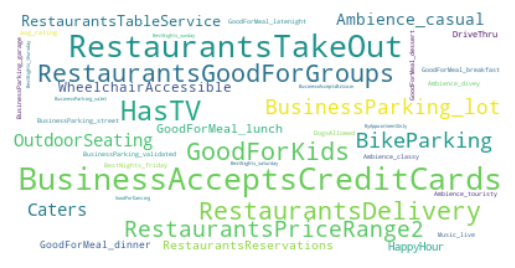

In [106]:
wordcloud = WordCloud(background_color="white")
wordcloud.generate_from_frequencies(frecuency2)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [107]:
count_att2 = pd.DataFrame([[key, frecuency2[key]] for key in frecuency2.keys()], columns=['Name', 'Amount'])
top2=count_att2.sort_values('Amount',ascending=False).head()
top2

Name  Amount
0  BusinessAcceptsCreditCards     190
3          RestaurantsTakeOut     184
1                       HasTV     134
4                 GoodForKids     125
5         RestaurantsDelivery     120

In [108]:
name_list=[]

# Iterar sobre los dataframes y agregar los valores de la columna 'name' a la lista
for x in [top5, top4, top3, top2]:
    name_list.extend(x['Name'].tolist())

# Imprimir la lista resultante
print(name_list)

['RestaurantsTakeOut', 'BusinessAcceptsCreditCards', 'RestaurantsDelivery', 'Caters', 'WheelchairAccessible', 'BusinessAcceptsCreditCards', 'RestaurantsTakeOut', 'HasTV', 'BikeParking', 'RestaurantsGoodForGroups', 'BusinessAcceptsCreditCards', 'RestaurantsTakeOut', 'HasTV', 'RestaurantsGoodForGroups', 'GoodForKids', 'BusinessAcceptsCreditCards', 'RestaurantsTakeOut', 'HasTV', 'GoodForKids', 'RestaurantsDelivery']


In [109]:
u_name_list=list(set(name_list))
u_name_list

['RestaurantsDelivery',
 'HasTV',
 'Caters',
 'RestaurantsGoodForGroups',
 'BusinessAcceptsCreditCards',
 'GoodForKids',
 'RestaurantsTakeOut',
 'WheelchairAccessible',
 'BikeParking']

In [110]:
df = pd.concat([top5['Name'], top4['Name'], top3['Name'], top2['Name']], axis=1, keys=['top5', 'top4', 'top3', 'top2'])
df

top5                        top4  \
2           RestaurantsTakeOut                         NaN   
0   BusinessAcceptsCreditCards                         NaN   
7          RestaurantsDelivery                         NaN   
1                       Caters  BusinessAcceptsCreditCards   
6         WheelchairAccessible                         NaN   
9                          NaN          RestaurantsTakeOut   
4                          NaN                       HasTV   
3                          NaN                 BikeParking   
5                          NaN    RestaurantsGoodForGroups   
14                         NaN                         NaN   
8                          NaN                         NaN   

                          top3                        top2  
2                          NaN                         NaN  
0                          NaN  BusinessAcceptsCreditCards  
7           RestaurantsTakeOut                         NaN  
1   BusinessAcceptsCreditCards                       HasTV  
6                          NaN                         NaN  
9                          NaN                         NaN  
4                          NaN                 GoodForKids  
3                        HasTV          RestaurantsTakeOut  
5                          NaN         RestaurantsDelivery  
14    RestaurantsGoodForGroups                         NaN  
8                  GoodForKids                         NaN

In [111]:
#Creating an empty list to keep the booleans
bools = []

# Iterate over attributes to create a list of booleans to each column
for attr in u_name_list:
    values = [
        attr in df['top5'].tolist(),
        attr in df['top4'].tolist(),
        attr in df['top3'].tolist(),
        attr in df['top2'].tolist()
    ]
    bools.append([attr] + values)

# Create a new dataframe
new_df = pd.DataFrame(bools, columns=['Attribute', 'Rating 5', 'Rating 4', 'Rating 3', 'Rating 2'])

# Check the new dataframe
new_df

Attribute  Rating 5  Rating 4  Rating 3  Rating 2
0         RestaurantsDelivery      True     False     False      True
1                       HasTV     False      True      True      True
2                      Caters      True     False     False     False
3    RestaurantsGoodForGroups     False      True      True     False
4  BusinessAcceptsCreditCards      True      True      True      True
5                 GoodForKids     False     False      True      True
6          RestaurantsTakeOut      True      True      True      True
7        WheelchairAccessible      True     False     False     False
8                 BikeParking     False      True     False     False

In [112]:
attr = {}

for word in name_list:
    if word in attr:
        attr[word] += 1
    else:
        attr[word] = 1
print(attr)

{'RestaurantsTakeOut': 4, 'BusinessAcceptsCreditCards': 4, 'RestaurantsDelivery': 2, 'Caters': 1, 'WheelchairAccessible': 1, 'HasTV': 3, 'BikeParking': 1, 'RestaurantsGoodForGroups': 2, 'GoodForKids': 2}


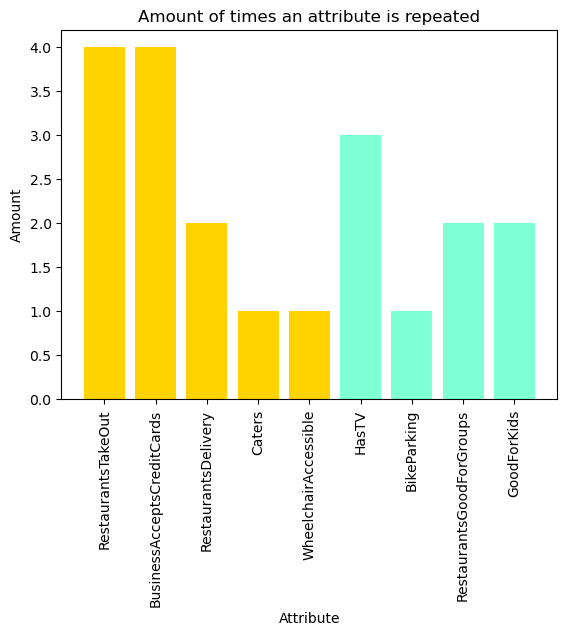

In [127]:
import matplotlib.pyplot as plt

#Dict->attr
top5_attr=top5['Name'].to_list()
#print(top5_attr)

# List of keys and values
Name = list(attr.keys())
Amount = list(attr.values())

# Define bar color
colors = ['#7FFFD4'] * len(Name)


# Define bar color is the an attribute in top5
for i, nam in enumerate(Name):
    if nam in top5_attr:
        colors[i] =  '#FFD300'

# Crear la gráfica de barras
plt.bar(Name, Amount, color=colors)

# Agregar títulos y etiquetas
plt.title('Amount of times an attribute is repeated')
plt.xlabel('Attribute')
plt.ylabel('Amount')
plt.xticks(rotation=90)
# Mostrar la gráfica
plt.show()


From this section we can see that **there are certain characteristics that are common to most restaurants, as accepting credit cards or allowing takeaway purchases. But there are other services that only <font color= '#ffa500'>5-star </font> restaurants have, such as <font color=" 	#ffa500">catering service or possibility of wheelchair access.</font>**

## Relationship between categories and recommendations.

In [114]:
print(type(data['categories']))

<class 'pandas.core.series.Series'>


In [115]:
print(type(data['categories'][0]))

<class 'str'>


In [116]:
col_cat = data['categories'].tolist()

#print(col_cat)
#print(len(col_cat))
#print(col_cat[0])
#print(type(col_cat[0]))
#print(eval(col_cat[0]))


In [117]:
col_cat = data['categories'].tolist()

#print(col_cat)
print(len(col_cat))
print(col_cat[0])
print(type(col_cat[0]))
#print(eval(col_cat[0]))
col_cat_list = col_cat[0].split(', ')
print(col_cat_list)

4003
Vietnamese, Food, Restaurants, Food Trucks
<class 'str'>
['Vietnamese', 'Food', 'Restaurants', 'Food Trucks']


In [118]:
resultant_list = []

for col_ in col_cat:
    col_cat = col_.split(', ')
    resultant_list.append(col_cat)

print(resultant_list)

[['Vietnamese', 'Food', 'Restaurants', 'Food Trucks'], ['Burgers', 'Sports Bars', 'Bars', 'Lounges', 'Restaurants', 'Salad', 'Wraps', 'Nightlife', 'American (New)'], ['Restaurants', 'Italian', 'Food Trucks', 'Food'], ['Restaurants', 'French', 'Moroccan', 'Seafood', 'Mediterranean'], ['Mexican', 'Fast Food', 'Restaurants'], ['Fast Food', 'Sandwiches', 'Chicken Shop', 'Restaurants'], ['Restaurants', 'American (New)', 'Burgers', 'Fast Food', 'Steakhouses'], ['American (Traditional)', 'Restaurants', 'Burgers', 'Wraps', 'Sandwiches', 'Bars', 'Nightlife', 'Beer Bar'], ['Bars', 'Pubs', 'Nightlife', 'Arts & Entertainment', 'Irish', 'Restaurants', 'Music Venues'], ['Irish Pub', 'Bars', 'Restaurants', 'Irish', 'Nightlife'], ['Restaurants', 'Breakfast & Brunch', 'Coffee Roasteries', 'Coffee & Tea', 'Food'], ['Restaurants', 'Sandwiches'], ['Salad', 'Hot Dogs', 'Burgers', 'Restaurants', 'American (Traditional)', 'Fast Food'], ['Restaurants', 'Mexican', 'American (Traditional)'], ['Restaurants', 'It

In [119]:
list_cat = list(itertools.chain.from_iterable(resultant_list))

print(list_cat)

['Vietnamese', 'Food', 'Restaurants', 'Food Trucks', 'Burgers', 'Sports Bars', 'Bars', 'Lounges', 'Restaurants', 'Salad', 'Wraps', 'Nightlife', 'American (New)', 'Restaurants', 'Italian', 'Food Trucks', 'Food', 'Restaurants', 'French', 'Moroccan', 'Seafood', 'Mediterranean', 'Mexican', 'Fast Food', 'Restaurants', 'Fast Food', 'Sandwiches', 'Chicken Shop', 'Restaurants', 'Restaurants', 'American (New)', 'Burgers', 'Fast Food', 'Steakhouses', 'American (Traditional)', 'Restaurants', 'Burgers', 'Wraps', 'Sandwiches', 'Bars', 'Nightlife', 'Beer Bar', 'Bars', 'Pubs', 'Nightlife', 'Arts & Entertainment', 'Irish', 'Restaurants', 'Music Venues', 'Irish Pub', 'Bars', 'Restaurants', 'Irish', 'Nightlife', 'Restaurants', 'Breakfast & Brunch', 'Coffee Roasteries', 'Coffee & Tea', 'Food', 'Restaurants', 'Sandwiches', 'Salad', 'Hot Dogs', 'Burgers', 'Restaurants', 'American (Traditional)', 'Fast Food', 'Restaurants', 'Mexican', 'American (Traditional)', 'Restaurants', 'Italian', 'Nightlife', 'Souther

In [120]:
cat = {}

for word in list_cat:
    if word in cat:
        cat[word] += 1
    else:
        cat[word] = 1
print(cat)

{'Vietnamese': 70, 'Food': 1346, 'Restaurants': 4002, 'Food Trucks': 187, 'Burgers': 253, 'Sports Bars': 171, 'Bars': 822, 'Lounges': 69, 'Salad': 279, 'Wraps': 50, 'Nightlife': 843, 'American (New)': 502, 'Italian': 316, 'French': 22, 'Moroccan': 4, 'Seafood': 488, 'Mediterranean': 101, 'Mexican': 314, 'Fast Food': 138, 'Sandwiches': 641, 'Chicken Shop': 49, 'Steakhouses': 135, 'American (Traditional)': 674, 'Beer Bar': 82, 'Pubs': 108, 'Arts & Entertainment': 122, 'Irish': 28, 'Music Venues': 53, 'Irish Pub': 29, 'Breakfast & Brunch': 557, 'Coffee Roasteries': 21, 'Coffee & Tea': 263, 'Hot Dogs': 55, 'Southern': 77, 'Pizza': 454, 'Chicken Wings': 176, 'Cafes': 296, 'Vegetarian': 83, 'Event Planning & Services': 250, 'Arcades': 10, 'Race Tracks': 1, 'Active Life': 56, 'Mini Golf': 1, 'Go Karts': 1, 'Venues & Event Spaces': 85, 'Kebab': 10, 'Middle Eastern': 43, 'Lebanese': 10, 'Greek': 99, 'Ice Cream & Frozen Yogurt': 83, 'Creperies': 11, 'Gelato': 14, 'Comfort Food': 56, 'Japanese': 

In [121]:
count_cat = pd.DataFrame([[key, cat[key]] for key in cat.keys()], columns=['Name', 'Amount'])
top_cat=count_cat.sort_values('Amount',ascending=False).head(20)
top_cat

Name  Amount
2                 Restaurants    4002
1                        Food    1346
10                  Nightlife     843
6                        Bars     822
22     American (Traditional)     674
19                 Sandwiches     641
29         Breakfast & Brunch     557
11             American (New)     502
15                    Seafood     488
34                      Pizza     454
12                    Italian     316
17                    Mexican     314
36                      Cafes     296
8                       Salad     279
31               Coffee & Tea     263
4                     Burgers     253
38  Event Planning & Services     250
54                 Sushi Bars     223
80                   Desserts     215
76                    Chinese     205

From this section we can see that the most used type of business is the restaurant, and the type of food with the largest number of establishments is **American food being traditional or new** and also fast food such as **breakfasts and sandwiches**.

# Conclusions.

* The location does not seem to be related to the score.

* The number of reviews seems to be related to the score.

* There are certain attributes that are standardized among all types of restaurants, but there are attributes as:catering service or possibility of wheelchair access that are high ranked by the customers. 

* The most popular categories are associated with American food, breakfasts and sandwiches.